In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
netflix = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
details = netflix.describe



In [4]:
Age = netflix.Age.value_counts()
print(Age)
Devices = netflix.Device.value_counts()
print(Devices)

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64
Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


(600.0, 640.0)

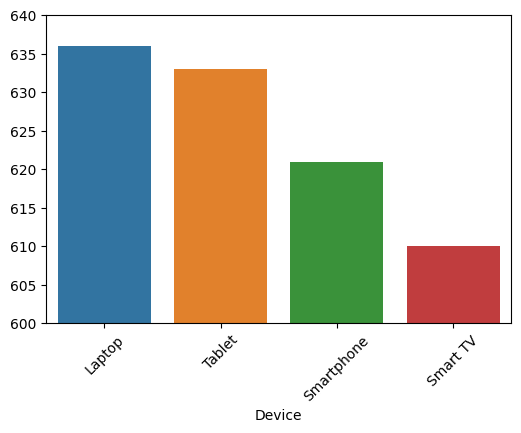

In [5]:
#Here is a visual display of the preferred device to use netflix on
plt.figure(figsize=(6,4))
sns.barplot(x=Devices.index, y=Devices.values)
plt.xticks(rotation=45)
plt.ylim(600, 640)

(700.0, 1000.0)

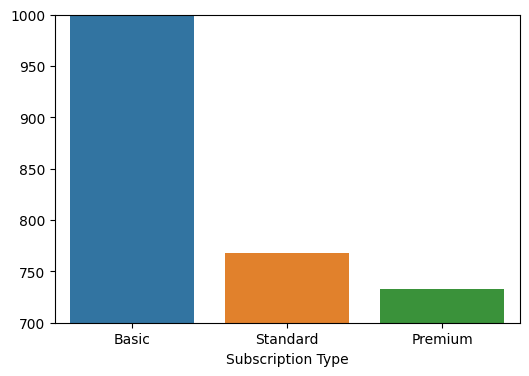

In [6]:

amount_plans = netflix['Subscription Type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=amount_plans.index,y=amount_plans.values)
plt.ylim(700,1000)
